In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'/home/bala/Documents/Mini Project/DataSet/hotel_bookings.csv')

In [4]:
type ( df )

pandas.core.frame.DataFrame

In [5]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


# Data PreProcessing

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(['agent','company'],axis=1,inplace=True)

In [10]:
df['country'].value_counts().index[0]

'PRT'

In [11]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [12]:
df.fillna(0,inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [15]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
data = df[~filter1]

In [17]:
data.shape

(119210, 30)

In [18]:
data['is_canceled'].unique()

array([0, 1])

In [19]:
data[data['is_canceled']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [20]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BFA    0.000013
ZMB    0.000013
BWA    0.000013
NCL    0.000013
NAM    0.000013
Name: country, Length: 165, dtype: float64

In [21]:
countryData = data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [22]:
countryData.columns=['country','no_of_guests']
countryData

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BFA,1
161,ZMB,1
162,BWA,1
163,NCL,1


In [23]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [24]:
import plotly.express as px

In [25]:
map_guest = px.choropleth(countryData,
             locations = countryData['country'],
             color = countryData['no_of_guests'],
             hover_name = countryData['country'],
             title = 'Home Country of Guests')

In [26]:
map_guest.show()

In [27]:
data2 = data[data['is_canceled']==0]

In [28]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'Price (EUR)')

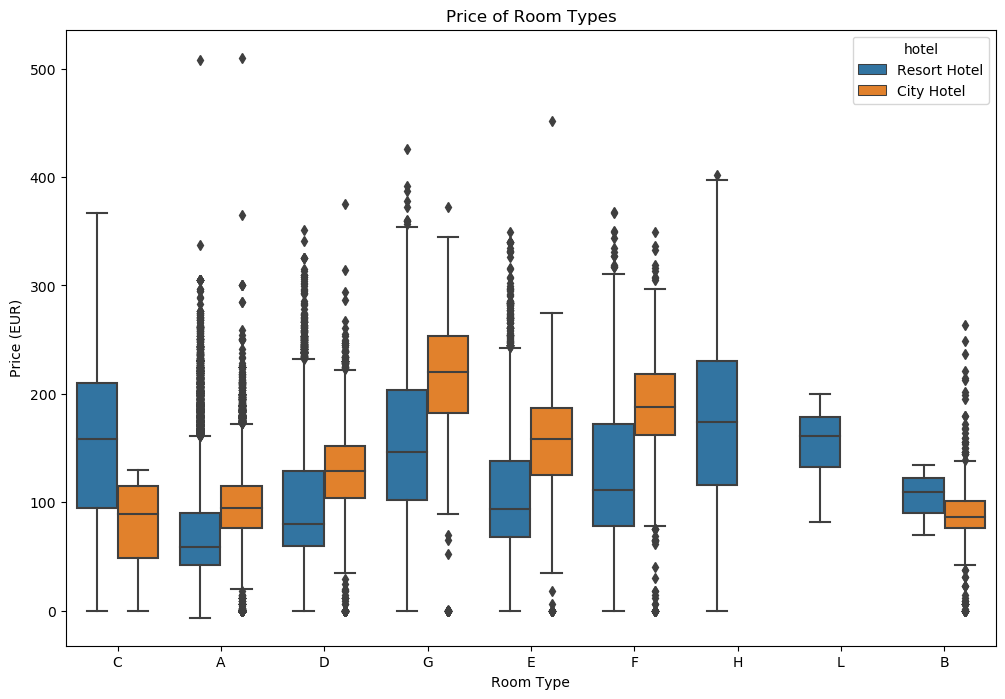

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)

plt.title("Price of Room Types")
plt.xlabel('Room Type')
plt.ylabel('Price (EUR)')

# Busy Months

In [30]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [31]:
resort_data = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city_data = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [32]:
resort_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [33]:
resort_rush = resort_data['arrival_date_month'].value_counts().reset_index()
resort_rush.columns = ['month','no_of_guests']

In [34]:
resort_rush

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [35]:
city_rush = city_data['arrival_date_month'].value_counts().reset_index()
city_rush.columns = ['month','no_of_guests']

In [36]:
city_rush

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [37]:
final_rush = city_rush.merge(resort_rush,on='month')

In [38]:
final_rush.columns = ['month','city_guests','resort_guests']

In [39]:
final_rush

,month,city_guests,resort_guests
0,August,5367,3257
1,July,4770,3137
2,May,4568,2535
3,June,4358,2037
4,October,4326,2575
5,September,4283,2102
6,March,4049,2571
7,April,4010,2550
8,February,3051,2308
9,November,2676,1975


In [40]:
!pip install sorted-months-weekdays

Defaulting to user installation because normal site-packages is not writeable


In [41]:
!pip install sort_dataframeby_monthorweek

Defaulting to user installation because normal site-packages is not writeable


In [42]:
import sort_dataframeby_monthorweek as sd

In [43]:
final_rush = sd.Sort_Dataframeby_Month(final_rush,'month')

In [44]:
final_rush

,month,city_guests,resort_guests
0,January,2249,1866
1,February,3051,2308
2,March,4049,2571
3,April,4010,2550
4,May,4568,2535
5,June,4358,2037
6,July,4770,3137
7,August,5367,3257
8,September,4283,2102
9,October,4326,2575


In [45]:
px.line( data_frame = final_rush, x = 'month', y = ['city_guests','resort_guests'])

In [50]:
data = sd.Sort_Dataframeby_Month(data,'arrival_date_month')

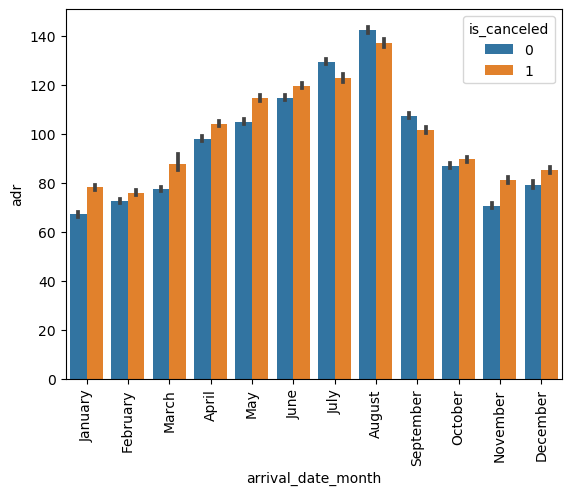

In [53]:
sns.barplot( x = 'arrival_date_month', y ='adr', data = data, hue = 'is_canceled')
plt.xticks(rotation='vertical')
plt.show()

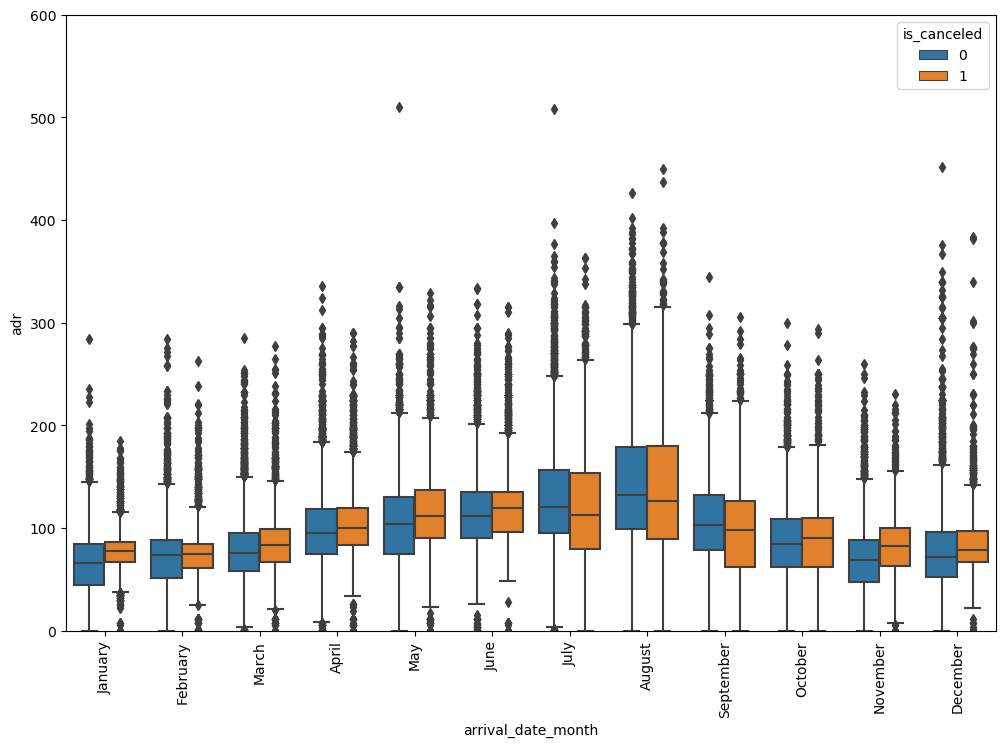

In [60]:
plt.figure( figsize = (12,8))

sns.boxplot( x = 'arrival_date_month', y ='adr', data = data, hue = 'is_canceled')
plt.xticks(rotation='vertical')

plt. ylim(0,600)
plt.show()